In [2]:
#n-Asset Efficient Frontier 

In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er=erk.annualized_rets(ind["1996":"2000"],12)

cov=ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
def plot_ef(n_points, er, cov, style=".-"):
    weights= minimize_vol(target_return)
    rets=[portfolio_return(w, er)for w in weights]
    vols=[portfolio_vol(w, cov)for w in weights]
    ef=pd.DataFrame({
        "Return":rets, "Volatility":vols
    })
    return ef.plot.line(x="Volatility", y="Return", style=style)

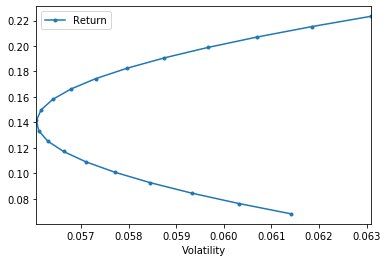

In [27]:
from scipy.optimize import minimize
l=["Games","Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])


In [34]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    from target retunr to weight
    """
    n=er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds=((0.0, 1.0),)*n
    
    return_is_target = {
        'type':'eq',
        'args':(er,),
        'fun': lambda weights, er:target_return - erk.portfolio_return(weights, er)
       
    }
    weights_sum_to_1={
        'type':'eq',
        'fun':lambda weights:np.sum(weights) -1
    
    }
    weights=minimize(erk.portfolio_vol, init_guess,
                     args=(cov,), method="SLSQP",
                     options={'disp': False},
                     constraints=(return_is_target, weights_sum_to_1),
                     bounds=bounds     
                    )
    return weights.x

In [35]:
l=["Games","Fin"]

In [12]:
l

['Games', 'Fin']

In [36]:
w15= minimize_vol(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [37]:
vol15=erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [38]:
w15=erk.minimize_vol(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [42]:
l=["Smoke", "Fin","Games", "Coal"]
w15=erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15=erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.050344225659300766

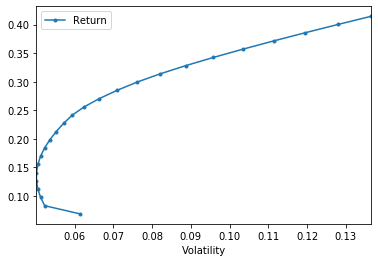

In [40]:
erk.plot_ef(25, er[l], cov.loc[l,l])